<a href="https://colab.research.google.com/github/ruman23/categoriseSocialMediaProfile/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle

%matplotlib inline

## Create Class for Posts

In [13]:
'''
sport=0
religious=1
travel=2
extremism=3
political=4
as usual=5
'''
clmn = ['sport', 'religious', 'travel', 'extremism', 'political', 'as usual']

data = pd.read_csv('Data.csv')
data.status.fillna('...', inplace = True)
data.head()

,status,label
0,"আমরা আশা করি, ছাত্রশিবির নেতাকর্মীসহ সমাজের প্...",4
1,"সোজা কথায় কাজ হয় না, ঘাড় ধাক্কা দিয়া বললে ঠিক ...",5
2,আত্মরক্ষার প্রয়াস সর্বাবস্থায় নারীপুরুষ নির্বি...,1
3,দাওয়াত ও তাবলীগ এর মৌলিক পরিচয়ঃ দুনিয়ার বুকে ...,1
4,বালকটি বৃষ্টি পাগল. অনেকদিন বৃষ্টির অপেক্ষায় প...,5


## Show the number posts against their Classes

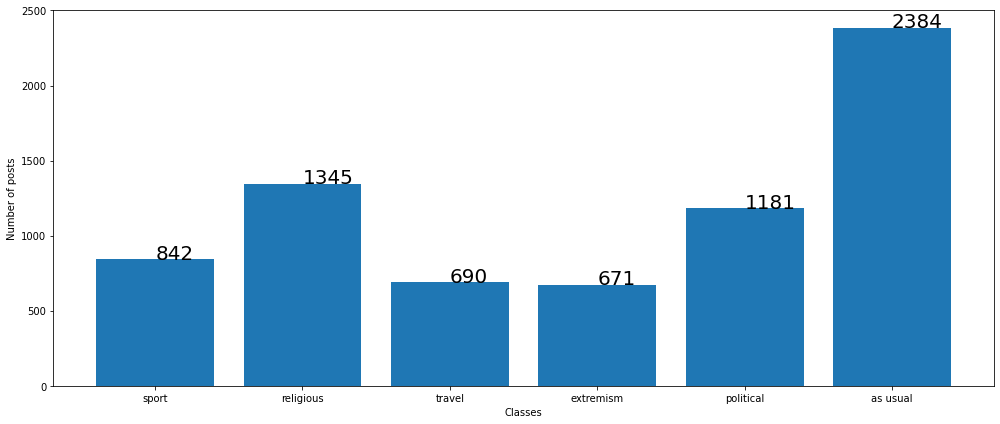

7113
[842, 1345, 690, 671, 1181, 2384]


In [14]:
cnts = [0]*6

for i in range(6):
    cnts[i] = len(data[data.label==i])
y_pos = np.arange(len(clmn))
plt.figure(figsize=(14, 6))
plt.bar(y_pos, cnts)
plt.xticks(y_pos, clmn)
plt.xlabel('Classes')
plt.ylabel('Number of posts')

for index, countData in enumerate(cnts):
    plt.text(x=index , y =countData+2 , s=f"{round(countData, 2)}" , fontdict=dict(fontsize=20))
plt.tight_layout()

plt.show()


print(len(data))
print(cnts)

## Use CountVectorizer for counting the n-gram frequency

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

vec = CountVectorizer(ngram_range=(1, 3))
X = vec.fit_transform(data.status.values)
y = data.label.values

## Split training testing data. Take 20% data for testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MultinomialNB

In [ ]:
mnbClf = MultinomialNB()
mnbClf.fit(X_train, y_train)
mnbClf_pred = mnbClf.predict(X_test)
cm = confusion_matrix(y_test, mnbClf_pred)
print(cm)
mnbClfAc = accuracy_score(y_test, mnbClf_pred)
print(mnbClfAc)

[[138   1   0   0   0  20]
 [  0 259   0   0   4  22]
 [  0  12  95   0   0  25]
 [  3  11   4  65   5  41]
 [  0   4   0   0 211  24]
 [  3   9   2   2  10 453]]
0.8580463808854533


## LogisticRegression

In [ ]:
lrClf = LogisticRegression(fit_intercept=True, intercept_scaling=1, class_weight='balanced', solver='liblinear', max_iter=500)
lrClf.fit(X_train, y_train)
lrClf_pred = mnbClf.predict(X_test)
cm = confusion_matrix(y_test, lrClf_pred)
print(cm)
lrClfAc = accuracy_score(y_test, lrClf_pred)
print(lrClfAc)

[[138   1   0   0   0  20]
 [  0 259   0   0   4  22]
 [  0  12  95   0   0  25]
 [  3  11   4  65   5  41]
 [  0   4   0   0 211  24]
 [  3   9   2   2  10 453]]
0.8580463808854533


## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfClf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=40)
rfClf.fit(X_train, y_train)
rfClf_pred = rfClf.predict(X_test)
cm = confusion_matrix(y_test, rfClf_pred)
print(cm)
rfClfAc = accuracy_score(y_test, rfClf_pred)
print(rfClfAc)

[[  0   0   0   0   0 159]
 [  0 140   0   0   0 145]
 [  0   0   0   0   0 132]
 [  0   0   0   0   0 129]
 [  0   0   0   0   0 239]
 [  0   0   0   0   0 479]]
0.4349964862965566



## LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

lSVC_clf = LinearSVC(max_iter=10000)
lSVC_clf.fit(X_train, y_train)
lSVC_clf_pred = lSVC_clf.predict(X_test)
cm = confusion_matrix(y_test, lSVC_clf_pred)
print(cm)
lSVC_clfAc = accuracy_score(y_test, lSVC_clf_pred)
print(lSVC_clfAc)

[[146   0   0   0   4   9]
 [  0 266   3   2   2  12]
 [  0   0 123   0   0   9]
 [  0   2   3  98   2  24]
 [  2   1   5   4 199  28]
 [  4   2  15  10  10 438]]
0.8924806746310612



## 5 fold Cross validation for MultinomialNB, LogisticRegression, RandomForestClassifier and LinearSVC

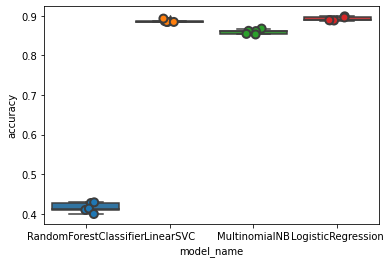

In [ ]:

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=40),
    LinearSVC(max_iter=10000),
    MultinomialNB(),
    LogisticRegression(random_state=0)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

## Mean accuracy for MultinomialNB, LogisticRegression, RandomForestClassifier and LinearSVC

In [ ]:
accuracyDF = cv_df.groupby('model_name').accuracy.mean()
print(accuracyDF)

model_name
LinearSVC                 0.886828
LogisticRegression        0.892169
MultinomialNB             0.859832
RandomForestClassifier    0.415717
Name: accuracy, dtype: float64


# **Deep learning model**

# Import tensorflow and keras for building RNN and CNN

In [ ]:
from tensorflow.keras.layers import Embedding, Input, LSTM, Dense, MaxPooling1D, GlobalMaxPooling1D, Dropout, GRU
from tensorflow.keras.layers import Conv1D, Flatten,Bidirectional
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import losses, optimizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.activations import softmax
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Use Tokenizer for creating creating word tokens

---



In [ ]:
max_feautres = 10000
tok = Tokenizer(num_words=max_feautres)
tok.fit_on_texts(data.status)
print(len(tok.word_index))

21311


# Converting the word sequence to corresponding number sequence

In [ ]:
seq_len = 200
data['status_seq'] = tok.texts_to_sequences(data.status)

# Padding the sequences to make same lenght (200)

In [ ]:
X = pad_sequences(data.status_seq, maxlen=seq_len)

# Convert Label to One-hot encoding

In [ ]:
y = to_categorical(data.label, num_classes=len(clmn))

## Split training and testing data. Take 20% data for testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Set parameteres model

In [ ]:
emmbed_size = 64
lstm_size = 100
batch_size = 300
n_layers = 2
n_input = seq_len

# Build the RNN model

In [ ]:
inp = Input(shape=(n_input, ))
x = Embedding(max_feautres, emmbed_size, input_length=n_input)(inp)
for _ in range(n_layers):
    x = LSTM(lstm_size, return_sequences=True)(x)
    x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(6, activation='softmax')(x)

model = Model(inputs=inp, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 64)           640000    
_________________________________________________________________
lstm (LSTM)                  (None, 200, 100)          66000     
_________________________________________________________________
dropout (Dropout)            (None, 200, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 200, 100)          80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 100)          0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0     

In [ ]:
model.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 50, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2, shuffle=True)

Epoch 1/50
19/19 - 48s - loss: 1.5515 - accuracy: 0.4132 - val_loss: 1.3427 - val_accuracy: 0.4772
Epoch 2/50
19/19 - 42s - loss: 1.3021 - accuracy: 0.4963 - val_loss: 1.2381 - val_accuracy: 0.5046
Epoch 3/50
19/19 - 42s - loss: 1.1442 - accuracy: 0.5633 - val_loss: 1.0369 - val_accuracy: 0.6374
Epoch 4/50
19/19 - 43s - loss: 0.9208 - accuracy: 0.6554 - val_loss: 0.9227 - val_accuracy: 0.6606
Epoch 5/50
19/19 - 44s - loss: 0.7465 - accuracy: 0.7091 - val_loss: 0.7951 - val_accuracy: 0.7210
Epoch 6/50
19/19 - 42s - loss: 0.5452 - accuracy: 0.7905 - val_loss: 0.7763 - val_accuracy: 0.7969
Epoch 7/50
19/19 - 42s - loss: 0.4154 - accuracy: 0.8492 - val_loss: 0.6999 - val_accuracy: 0.8398
Epoch 8/50
19/19 - 42s - loss: 0.3169 - accuracy: 0.8910 - val_loss: 0.7736 - val_accuracy: 0.8700
Epoch 9/50
19/19 - 42s - loss: 0.2644 - accuracy: 0.9130 - val_loss: 0.5467 - val_accuracy: 0.8756
Epoch 10/50
19/19 - 42s - loss: 0.2047 - accuracy: 0.9323 - val_loss: 0.5190 - val_accuracy: 0.9009
Epoch 11/

# Create confusion matrix and predict accuracy for RNN

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_tmp = np.argmax(y_test, axis=1)
rnnAc = accuracy_score(y_tmp, pred)
cnf = confusion_matrix(y_tmp, pred)

print('RNN:', rnnAc)
print(cnf)

RNN: 0.9163738580463809
[[159   0   2   0   4   9]
 [  1 261   1   2   5  10]
 [  0   0 133   0   0   8]
 [  0   3   6 104   0  10]
 [ 15   7   1   2 202   8]
 [ 14   0   7   2   2 445]]


# Build the CNN model

In [ ]:
# The CNN model
inp = Input(shape=(n_input, ))
x = Embedding(max_feautres, emmbed_size, input_length=n_input)(inp)
x = Conv1D(32, 5, strides=1)(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.2)(x)
x = Conv1D(64, 10, strides=1)(x)
x = MaxPooling1D(pool_size=5)(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(6, activation='softmax')(x)

model = Model(inputs=inp, outputs=x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 64)           640000    
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 32)           10272     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 89, 64)            20544     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 17, 64)            0   

# Compile and fit the CNN model

In [ ]:
model.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 100, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2, shuffle=True)

Epoch 1/100
19/19 - 6s - loss: 1.5824 - accuracy: 0.3873 - val_loss: 1.4488 - val_accuracy: 0.4406
Epoch 2/100
19/19 - 5s - loss: 1.3892 - accuracy: 0.4545 - val_loss: 1.3187 - val_accuracy: 0.4863
Epoch 3/100
19/19 - 5s - loss: 1.2988 - accuracy: 0.4975 - val_loss: 1.2658 - val_accuracy: 0.4961
Epoch 4/100
19/19 - 5s - loss: 1.2279 - accuracy: 0.5035 - val_loss: 1.1957 - val_accuracy: 0.5151
Epoch 5/100
19/19 - 5s - loss: 1.1295 - accuracy: 0.5406 - val_loss: 1.1115 - val_accuracy: 0.5784
Epoch 6/100
19/19 - 5s - loss: 1.0171 - accuracy: 0.5902 - val_loss: 1.0712 - val_accuracy: 0.6072
Epoch 7/100
19/19 - 5s - loss: 0.9268 - accuracy: 0.6429 - val_loss: 1.0330 - val_accuracy: 0.6304
Epoch 8/100
19/19 - 5s - loss: 0.8514 - accuracy: 0.6782 - val_loss: 1.0084 - val_accuracy: 0.6571
Epoch 9/100
19/19 - 5s - loss: 0.7812 - accuracy: 0.7121 - val_loss: 1.0026 - val_accuracy: 0.6803
Epoch 10/100
19/19 - 5s - loss: 0.7310 - accuracy: 0.7353 - val_loss: 1.0100 - val_accuracy: 0.6866
Epoch 11/

# Create confusion matrix and predict accuracy for CNN

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_tmp = np.argmax(y_test, axis=1)
cnnAc = accuracy_score(y_tmp, pred)
cnf = confusion_matrix(y_tmp, pred)

print('CNN:', cnnAc)
print(cnf)

CNN: 0.780744905130007
[[127   0   0   0   2  45]
 [ 10 242   0   2   3  23]
 [  0   0  82   0   0  59]
 [  2   0   0  44   4  73]
 [  4   1   0   9 165  56]
 [  6   0   0   9   4 451]]


# Build the RNN+CNN model

In [ ]:
inp = Input(shape=(n_input, ))
x = Embedding(max_feautres, emmbed_size, input_length=n_input)(inp)
for _ in range(1):
    x = LSTM(50, return_sequences=True)(x)
    x = Dropout(0.2)(x)
x = Conv1D(32, 5, strides=1)(x)
x = MaxPooling1D(pool_size=3)(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(6, activation='softmax')(x)

model = Model(inputs=inp, outputs=x)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 64)           640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 200, 50)           23000     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200, 50)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 196, 32)           8032      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 65, 32)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 65, 32)            0   

In [ ]:
model.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 30, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2, shuffle=True)

Epoch 1/30
19/19 - 16s - loss: 1.6047 - accuracy: 0.3946 - val_loss: 1.4220 - val_accuracy: 0.4483
Epoch 2/30
19/19 - 13s - loss: 1.3355 - accuracy: 0.4898 - val_loss: 1.2385 - val_accuracy: 0.5777
Epoch 3/30
19/19 - 13s - loss: 1.1139 - accuracy: 0.6014 - val_loss: 0.9915 - val_accuracy: 0.6275
Epoch 4/30
19/19 - 13s - loss: 0.8853 - accuracy: 0.6749 - val_loss: 0.8639 - val_accuracy: 0.6894
Epoch 5/30
19/19 - 13s - loss: 0.7551 - accuracy: 0.7107 - val_loss: 0.7923 - val_accuracy: 0.7119
Epoch 6/30
19/19 - 13s - loss: 0.6193 - accuracy: 0.7596 - val_loss: 0.7315 - val_accuracy: 0.7660
Epoch 7/30
19/19 - 13s - loss: 0.5238 - accuracy: 0.8090 - val_loss: 0.6241 - val_accuracy: 0.8117
Epoch 8/30
19/19 - 13s - loss: 0.4022 - accuracy: 0.8555 - val_loss: 0.5835 - val_accuracy: 0.8482
Epoch 9/30
19/19 - 13s - loss: 0.3170 - accuracy: 0.8965 - val_loss: 0.5696 - val_accuracy: 0.8580
Epoch 10/30
19/19 - 13s - loss: 0.2561 - accuracy: 0.9123 - val_loss: 0.5631 - val_accuracy: 0.8763
Epoch 11/

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_tmp = np.argmax(y_test, axis=1)
rnnCnnAc = accuracy_score(y_tmp, pred)
cnf = confusion_matrix(y_tmp, pred)

print('RNN+CNN:', rnnCnnAc)
print(cnf)

RNN+CNN: 0.9163738580463809
[[159   0   2   0   4   9]
 [  1 261   1   2   5  10]
 [  0   0 133   0   0   8]
 [  0   3   6 104   0  10]
 [ 15   7   1   2 202   8]
 [ 14   0   7   2   2 445]]


# Accuracy Comparision

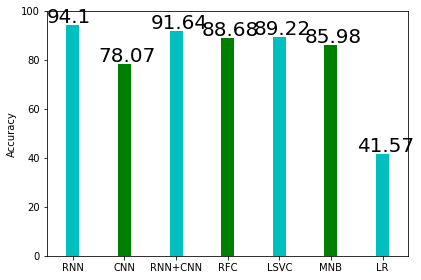

In [ ]:
xd = [rnnAc*100, cnnAc*100, rnnCnnAc*100]
for accuracty in accuracyDF:
  xd.append(accuracty*100)

plt.xlim(0, 28)
plt.ylim(0, 100)
plt.ylabel('Accuracy')
yd = [2, 6, 10, 14, 18, 22, 26]
plt.bar(yd, xd, 1, tick_label=['RNN', 'CNN', 'RNN+CNN', 'RFC', 'LSVC', 'MNB', 'LR'], color=['c', 'g'])

for index, data in enumerate(xd):
    plt.text(x=4*index , y =data+1 , s=f"{round(data, 2)}" , fontdict=dict(fontsize=20))
plt.tight_layout()

plt.show()